In [17]:
#!pip install dash pandas plotly
!pip install nbformat

C:\Users\Concremat\AppData\Local\Temp\ipykernel_30908\1766045632.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\pyprojects\pred_soccer\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

C:\Users\Concremat\AppData\Local\Temp\ipykernel_30908\1766045632.py:61: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.

C:\Users\Concremat\AppData\Local\Temp\ipykernel_30908\1766045632.py:61: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.

c:\pyprojects\pred_soccer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.

c:\pyprojects\pred_soccer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.

c:\pyproje

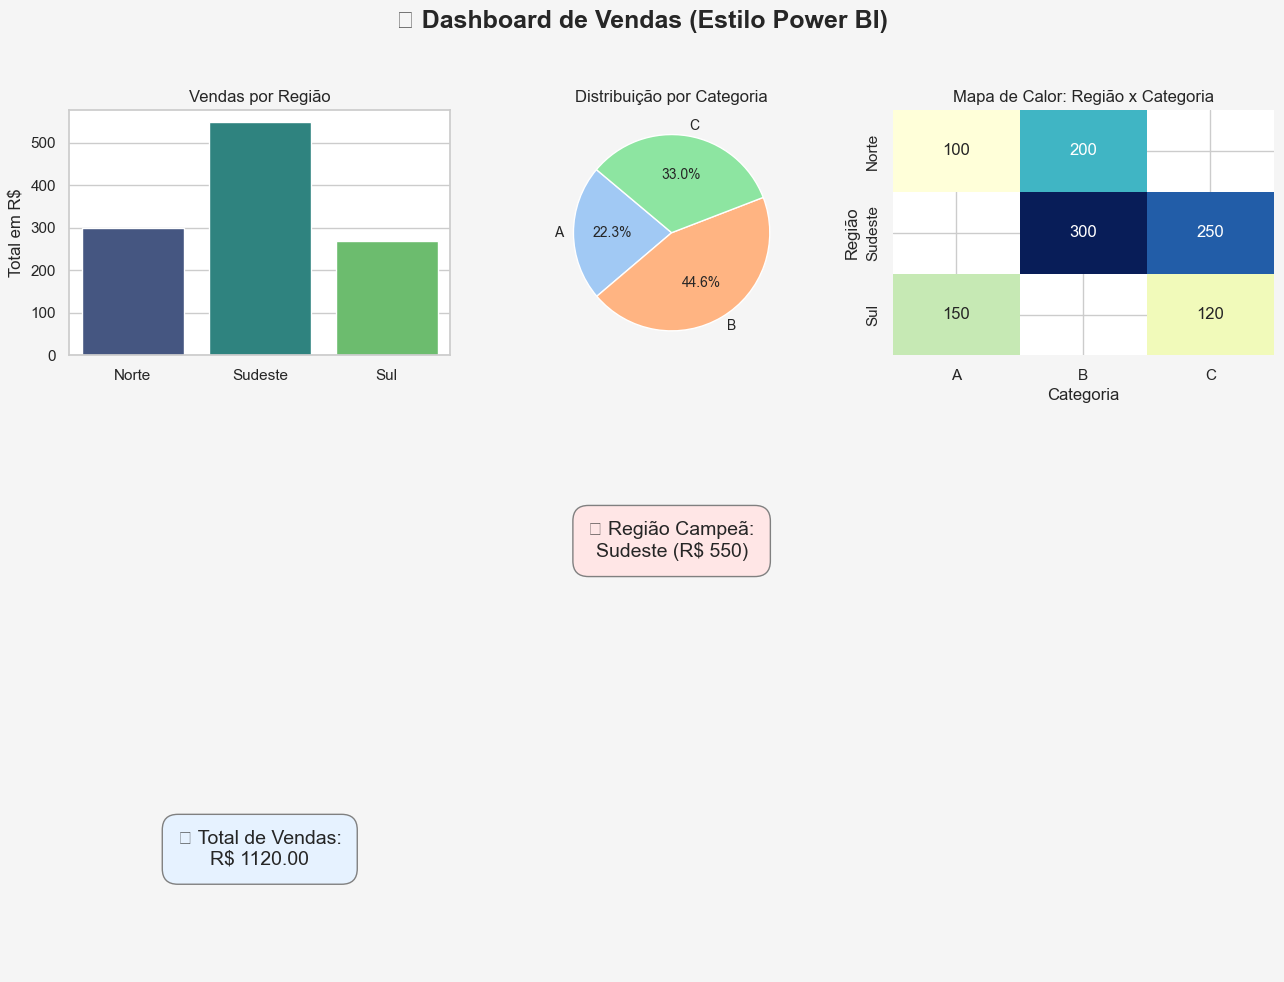

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Dados fictícios
df = pd.DataFrame({
    'Região': ['Norte', 'Sul', 'Norte', 'Sudeste', 'Sul', 'Sudeste'],
    'Categoria': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Vendas': [100, 150, 200, 300, 120, 250]
})

# Setup dos subplots (3x3)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
fig.patch.set_facecolor('#f5f5f5')  # cor de fundo geral
fig.suptitle("📊 Dashboard de Vendas (Estilo Power BI)", fontsize=18, weight='bold')

# Gráfico 1: Barras por Região (com Seaborn)
vendas_regiao = df.groupby("Região")["Vendas"].sum().reset_index()
sns.barplot(data=vendas_regiao, x="Região", y="Vendas", palette="viridis", ax=axs[0, 0])
axs[0, 0].set_title("Vendas por Região", fontsize=12)
axs[0, 0].set_ylabel("Total em R$")
axs[0, 0].set_xlabel("")

# Gráfico 2: Pizza por Categoria
vendas_categoria = df.groupby("Categoria")["Vendas"].sum()
axs[0, 1].pie(vendas_categoria.values,
              labels=vendas_categoria.index,
              autopct="%1.1f%%",
              colors=sns.color_palette("pastel"),
              startangle=140,
              textprops={'fontsize': 10})
axs[0, 1].set_title("Distribuição por Categoria", fontsize=12)

# Gráfico 3: Heatmap Região x Categoria
pivot = df.pivot_table(values="Vendas", index="Região", columns="Categoria", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", ax=axs[0, 2], cbar=False)
axs[0, 2].set_title("Mapa de Calor: Região x Categoria", fontsize=12)

# KPI 1
axs[2, 0].axis('off')
axs[2, 0].text(0.5, 0.5, f"💰 Total de Vendas:\nR$ {df['Vendas'].sum():.2f}",
              fontsize=14, ha='center', va='center',
              bbox=dict(facecolor='#e6f2ff', boxstyle='round,pad=0.8', edgecolor='gray'))

# KPI 2: Região com mais vendas
regiao_top = vendas_regiao.loc[vendas_regiao["Vendas"].idxmax()]
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, f"🏆 Região Campeã:\n{regiao_top['Região']} (R$ {regiao_top['Vendas']})",
              fontsize=14, ha='center', va='center',
              bbox=dict(facecolor='#ffe6e6', boxstyle='round,pad=0.8', edgecolor='gray'))

# Espaços vazios (cor neutra)
for i in range(3):
    for j in range(3):
        if (i, j) not in [(0,0), (0,1), (0,2), (1,1), (2,0)]:
            axs[i, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


In [19]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter(df, x="gdpPercap", y="lifeExp", size="pop", color="continent", hover_name="country", log_x=True)
fig#.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>con' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
                                  'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
                                  'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
                                  'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
                                  'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
                                  'Syria', 'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza',
                                  'Yemen, Rep.'], dtype=object),
              'legendgroup': 'Asia',
              'marker': {'color': '#636efa',
                         'size': {'bdata': ('A5rmAd3PCgDTqPcIkqLXANiBmU48g2' ... 'gmAZacYQF13OADFAAVBZxQPQCf7FIB'),
                                  'dtype': 'i4'},
                         'sizemode': 'area',
                         'sizeref': 3296707.74,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Asia',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('54R1iKR0jkDGpwAYAxndQPLPDOIDvZ' ... 'JsHicTo0BqNLkYs6KnQP2FHjGK0aFA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('RIts5/vpRUBxPQrXo+hSQIcW2c73A1' ... '2yne+PUkBeukkMAltSQNNNYhBYWU9A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>con' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
                                  'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
                                  'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
                                  'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
                                  'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
                                  'Turkey', 'United Kingdom'], dtype=object),
              'legendgroup': 'Europe',
              'marker': {'color': '#EF553B',
                         'size': {'bdata': ('i/A2AGcefQCikp4ABnZFAOq8bwAAkE' ... 'geAL8waQKwzYkAZUZzAHfLPQQuX58D'),
                                  'dtype': 'i4'},
                         'sizemode': 'area',
                         'sizeref': 3296707.74,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Europe',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('YBQEjwcxt0BYyjLEz6PhQG+70FyTc+' ... '0FaU1Q4kCSCI1gI4XAQOPfZ1xoNuBA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('UI2XbhIbU0CTGARWDvVTQE5iEFg53F' ... '8aL91sVEB9PzVeuvFRQDMzMzMz21NA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>con' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
                                  'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
                                  'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt',
                                  'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
                                  'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
                                  'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
                                  'Mozambique

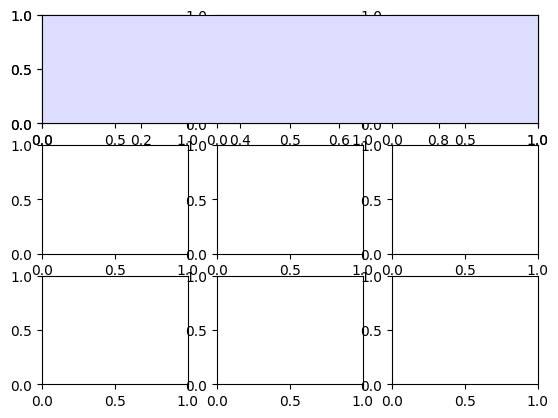

In [13]:

fig, axs = plt.subplots(nrows=3, ncols=3)

gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0, :])
ax.set_facecolor("#ddddff")


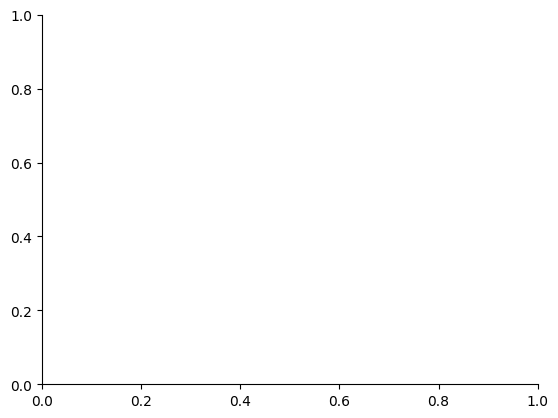

In [15]:
fig, ax = plt.subplots()
ax.spines["top"].set_color(None)
ax.spines["right"].set_color(None)


In [ ]:
import pandas as pd
import plotly.express as px

# Dados de exemplo
df = pd.DataFrame({
    'Região': ['Norte', 'Sul', 'Norte', 'Sudeste', 'Sul', 'Sudeste'],
    'Categoria': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Vendas': [100, 150, 200, 300, 120, 250]
})

# Agrupando por região
df_group = df.groupby('Região')['Vendas'].sum().reset_index()

# Criando gráfico interativo
fig = px.bar(df_group, x='Região', y='Vendas', title='Vendas por Região')
fig = px.bar(df_group, x='Região', y='Vendas', title='Vendas por Região')
fig = px.bar(df_group, x='Região', y='Vendas', title='Vendas por Região')


fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Região=%{x}<br>Vendas=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Norte', 'Sudeste', 'Sul'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'LAEmAg4B', 'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Vendas por Região'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Região'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Vendas'}}}
})

In [ ]:
from ipywidgets import interact

def mostrar_grafico(agrupamento):
    df_group = df.groupby(agrupamento)['Vendas'].sum().reset_index()
    fig = px.bar(df_group, x=agrupamento, y='Vendas', title=f'Vendas por {agrupamento}')
    fig.show()

interact(mostrar_grafico, agrupamento=['Região', 'Categoria'])
